  Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_decision_forests-1.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_decision_forests-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_decision_forests-1.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_decision_forests-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_decision_forests-1.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_decision_forests-1.8.0-cp310-cp310-manylinux_2_17_x8

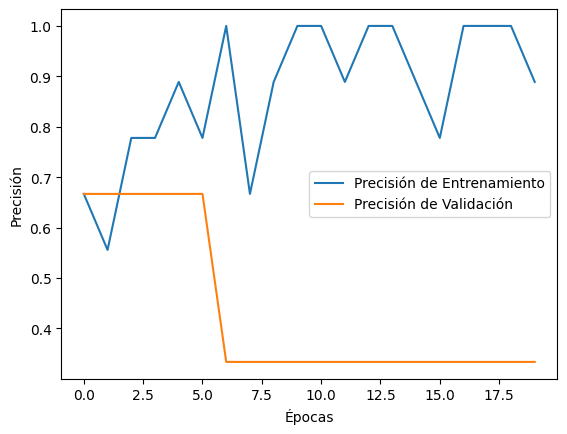

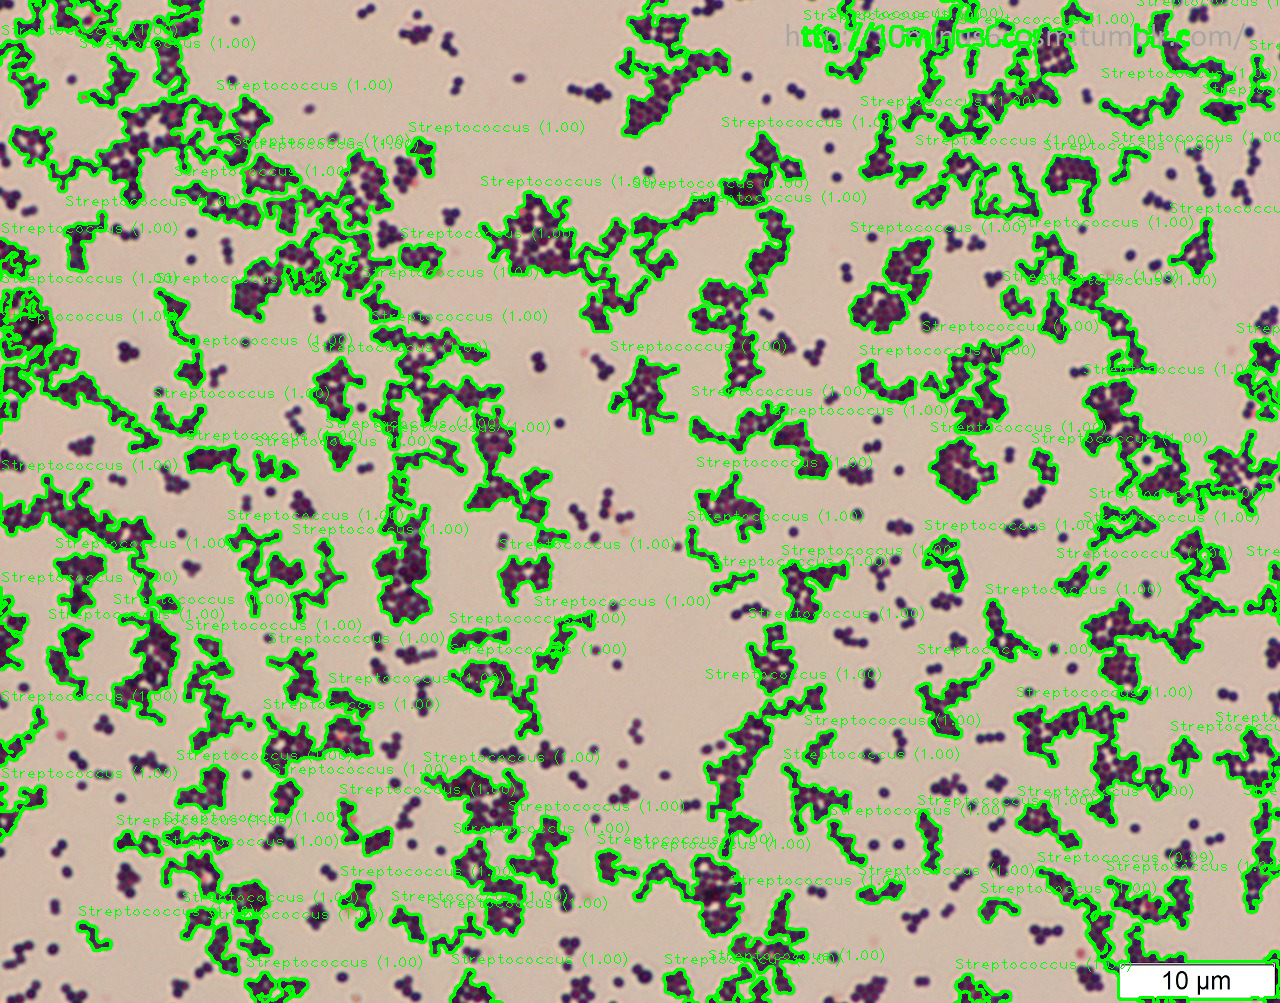

mkdir: cannot create directory ‘tfjs_bacteria_model’: File exists
2024-12-10 08:37:25.374951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/__init__.py", line 26, in <module>
    from tensorflowjs.converters.jax_conversion import convert_jax
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/jax_conversion.py", line 20, in <module>

In [ ]:
# Paso 1: Instalación de dependencias
!pip install tensorflow==2.8 tensorflowjs opencv-python numpy pandas matplotlib scikit-learn tensorflow-decision-forests

# Importar librerías necesarias
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Función para preprocesar imágenes
def preprocess_image(image_path, target_size=(64, 64)):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen en la ruta: {image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size)
        return image / 255.0  # Normalizar entre 0 y 1
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")
        return None

# Función para crear un modelo CNN avanzado
def create_advanced_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para predecir categorías (agua limpia vs agua sucia)
def predict_category(roi, model):
    try:
        roi_resized = cv2.resize(roi, (64, 64)) / 255.0
        roi_expanded = np.expand_dims(roi_resized, axis=0)
        prediction = model.predict(roi_expanded)
        return np.argmax(prediction), np.max(prediction)
    except Exception as e:
        print(f"Error al predecir: {e}")
        return None, None

# Actualización de rutas y etiquetas para Streptococcus y Staphylococcus
image_paths = [
    '/content/streptococcus_1.jpg', '/content/streptococcus_2.jpg', '/content/streptococcus_3.jpg',
    '/content/streptococcus_4.jpg', '/content/streptococcus_5.jpg', '/content/streptococcus_6.jpg',
    '/content/staphylococcus_1.jpg', '/content/staphylococcus_2.jpg', '/content/staphylococcus_3.jpg',
    '/content/staphylococcus_4.jpg', '/content/staphylococcus_5.jpg', '/content/staphylococcus_6.jpg'
]
labels = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 para Streptococcus, 1 para Staphylococcus

# Procesamiento de las imágenes
X, y = [], []
for path, label in zip(image_paths, labels):
    processed_image = preprocess_image(path)
    if processed_image is not None:
        X.append(processed_image)
        y.append(label)

if len(X) == 0:
    raise ValueError("Error: No se cargaron imágenes válidas. Verifica las rutas o el formato de las imágenes.")

X = np.array(X)
y = to_categorical(y, num_classes=2)

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = create_advanced_model((64, 64, 3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=8)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Pérdida en validación: {loss:.4f}")
print(f"Precisión en validación: {accuracy:.4f}")

# Mostrar métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Guardar el modelo
model.save('/content/bacteria_classification_model.h5')

# Detectar bacterias Streptococcus o Staphylococcus en una imagen de prueba
test_image_path = '/content/test_image.jpg'
image = cv2.imread(test_image_path)
if image is None:
    print("Error: La imagen de prueba no se pudo cargar.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 50, 150)
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)
    cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)

        # Filtrar regiones pequeñas
        if w * h < 1000:
            continue

        roi = image[y:y+h, x:x+w]
        if roi.size > 0:
            class_idx, confidence = predict_category(roi, model)
            if confidence is not None and confidence > 0.7:
                label = ["Streptococcus", "Staphylococcus"][class_idx]
                cv2.putText(image, f"{label} ({confidence:.2f})", (x, y-5), 1, 1, (0, 255, 0), 1)
            cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

    cv2_imshow(image)


In [ ]:

# Convertir el modelo a TensorFlow.js
!mkdir tfjs_bacteria_model
!tensorflowjs_converter --input_format keras --output_format tfjs_layers_model /content/bacteria_classification_model.h5 /content/tfjs_bacteria_model
